This is a basic notebook where I shall try to implement the basic K-means Clustering algorithm on some custom data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
df = pd.read_csv("k_means_data_1.csv")
df.head()

,x,y,z
0,222.853447,391.366485,a
1,246.563547,400.052438,a
2,235.048323,398.385602,a
3,151.098693,423.773313,a
4,227.510553,420.833002,a


Now I shall make a class of model which takes pandas dataframe as input and the clusters the data and returns the output.

In [3]:
def distance(a, b):
    return (a[0]-b[0])**2 + (a[1]-b[1])**2

In [4]:
def divide(numerator, denominator) :
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.divide(numerator, denominator)
        result[~np.isfinite(result)] = 0  # Replace -inf, inf, NaN with 0
    return result

In [5]:
class k_means():
    def __intit__(self):
        pass
    
    def cluster(self, data, num_clusters):
        self.data = data.copy()
        self.num_clusters = num_clusters
        dim = len(self.data.columns)-1
        columns = self.data.columns
        l = []
        for i in range(dim):
            l.append((min(self.data[columns[i]]), max(self.data[columns[i]])))

        self.cluster_center = [[np.random.uniform(i[0], i[1]) for i in l] for i in range(self.num_clusters)]
        
        self.data["z"] = 0
        
        for index in range(100):
            # print(index)
            for row in self.data.itertuples(index=True, name='PandasRow'):
                dis = [ distance(row[1:3],i) for i in self.cluster_center ]
                self.data.at[row[0], 'z'] = np.argmin(dis)

            sm, num = [[0,0]]*self.num_clusters, [0]*self.num_clusters
            for row in self.data.itertuples(index=True, name='PandasRow'):
                ind = row.z
                sm[ind][0]+= row.x
                sm[ind][1]+= row.y
                num[ind]+=1
            sm = np.array(sm)
            self.cluster_center = [ divide(sm[ind], num[ind]) for ind in range(len(num)) ]
        return self.data
                

As the data is 2-D, the center of each cluster is going to have two coordinated and we will randomly select those three coordinates.

In [6]:
model = k_means()

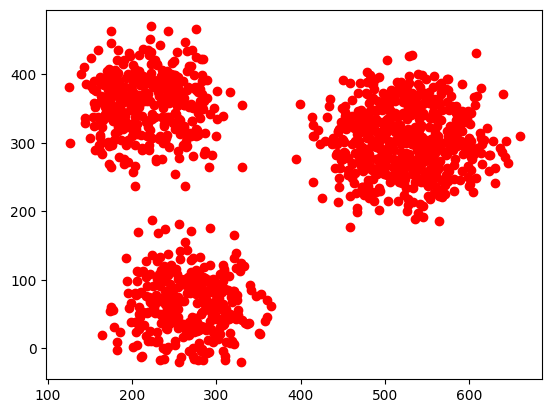

In [7]:
colors = {'a': 'red', 'b': 'blue', 'c': 'black'}

for cls in df['z'].unique():
    subset = df[df['z'] == cls]
    plt.scatter(subset['x'], subset['y'], label=cls, color=colors[cls])

In [8]:
data = model.cluster(df, 4)

In [9]:
model.cluster_center

[array([0., 0.]),
 array([423.5463665 , 297.10039853]),
 array([2735.61123772, 1918.91904459]),
 array([0., 0.])]

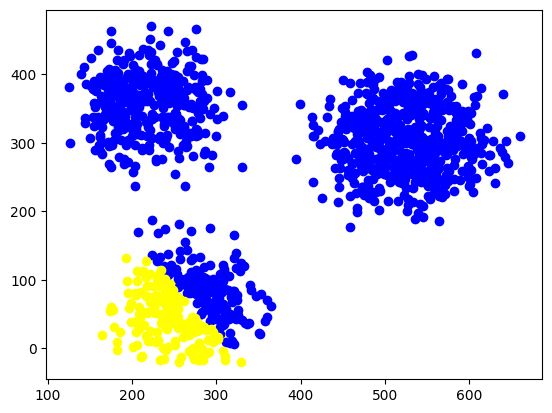

In [10]:
colors = {0: 'red', 1: 'blue', 2: 'yellow', 3: 'black'}

for cls in data['z'].unique():
    subset = data[data['z'] == cls]
    plt.scatter(subset['x'], subset['y'], label=cls, color=colors[cls])